[Stock Price Prediction Using Python & Machine Learning](https://www.youtube.com/watch?v=QIUxPv5PJOY)




In [38]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [39]:
df = web.DataReader('TITAN.NS',data_source='yahoo',start='2012-01-01',end='2022-05-08')

In [40]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,177.000000,171.350006,171.600006,175.149994,3717480.0,164.280106
2012-01-03,180.649994,176.500000,176.500000,179.550003,3552588.0,168.407043
2012-01-04,184.399994,175.600006,180.000000,177.800003,3670612.0,166.765656
2012-01-05,181.699997,174.050003,178.949997,176.449997,2736557.0,165.499435
2012-01-06,176.449997,170.500000,175.250000,172.899994,2948089.0,162.169739
...,...,...,...,...,...,...
2022-04-29,2532.000000,2450.000000,2521.000000,2458.199951,1496781.0,2458.199951
2022-05-02,2437.000000,2372.350098,2435.000000,2386.550049,1287401.0,2386.550049
2022-05-04,2407.000000,2275.000000,2356.000000,2289.949951,2357806.0,2289.949951


In [41]:
df.shape

(2549, 6)

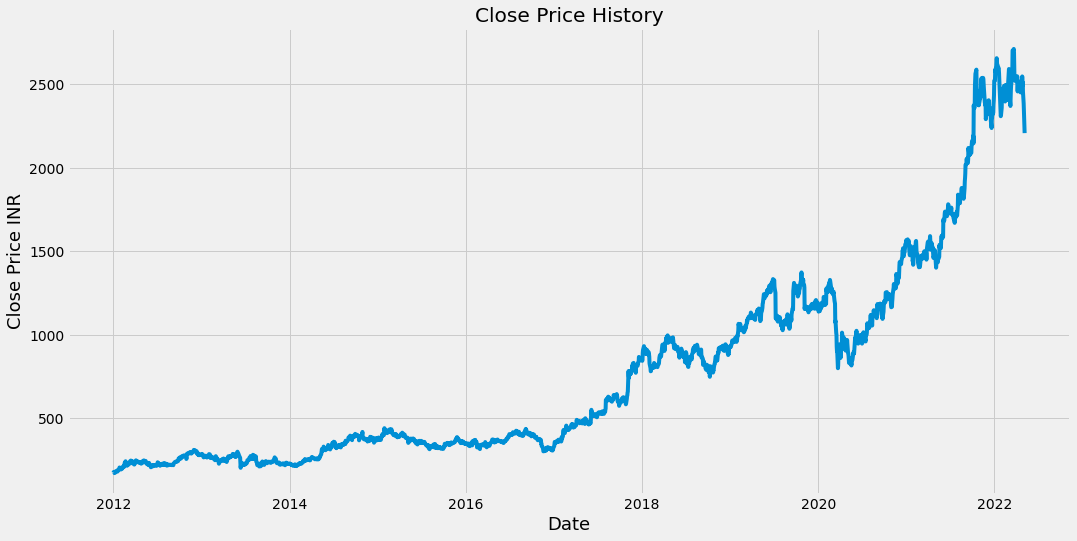

In [42]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price INR',fontsize=18)
plt.show()

In [43]:
data=df.filter(['Close'])
dataset=data.values
training_data_len= math.ceil(len(dataset) * .8)

#scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.00088588],
       [0.00261827],
       [0.00192925],
       ...,
       [0.83353346],
       [0.82252889],
       [0.80156308]])

In [44]:
#Create training data set

train_data=scaled_data[0:training_data_len,:]

#split the data into x_train and y_train data sets

x_train =[]
y_train=[]

################### 過去６０日分のデータでYを説明する、という形##################
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:

    print(x_train)
    print(y_train)
    print()

[array([0.00088588, 0.00261827, 0.00192925, 0.00139772, 0.        ,
       0.00104337, 0.00313011, 0.0042916 , 0.00444908, 0.00389787,
       0.00450815, 0.00460658, 0.00431128, 0.00374038, 0.00748076,
       0.00728389, 0.00752013, 0.0098431 , 0.01320944, 0.01124082,
       0.0118511 , 0.00917377, 0.00850444, 0.00937063, 0.01000059,
       0.01074867, 0.01411501, 0.01482371, 0.0134063 , 0.01415438,
       0.01425281, 0.01771758, 0.01679233, 0.02324941, 0.02793473,
       0.02094612, 0.02059177, 0.02090675, 0.01728449, 0.02057208,
       0.02185168, 0.02202886, 0.02228478, 0.02009961, 0.02279663,
       0.02303286, 0.0263992 , 0.0288206 , 0.0293915 , 0.02954899,
       0.02334784, 0.02385968, 0.02443058, 0.02791504, 0.02756068,
       0.02389905, 0.02336752, 0.02202886, 0.02559206, 0.02002087])]
[0.02189105890895257]



In [45]:
#convert train data to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

#Reshape
x_train.shape

(1980, 60)

In [46]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1980, 60, 1)

In [47]:
# build LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [49]:
#copile the model
model.compile(optimizer='adam',loss='mean_squared_error')


In [50]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1980/1980 [==============================] - 30s 14ms/step - loss: 5.7982e-04


In [51]:
model.save('keras_model.h5')

In [52]:
#create the testing data set
#create a new array containing scaled values from index 1543 to 2003
test_data=scaled_data[training_data_len - 60:,:]
#create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
  

In [53]:
#convert the data to a numpy array
x_test=np.array(x_test)
#reshape
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [54]:
#get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


In [55]:
#Get the root mean squared error(RMSE)
rmse=np.sqrt( np.mean((predictions - y_test)**2))
rmse

149.0042144435106

/tmp/ipykernel_73518/3644969146.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


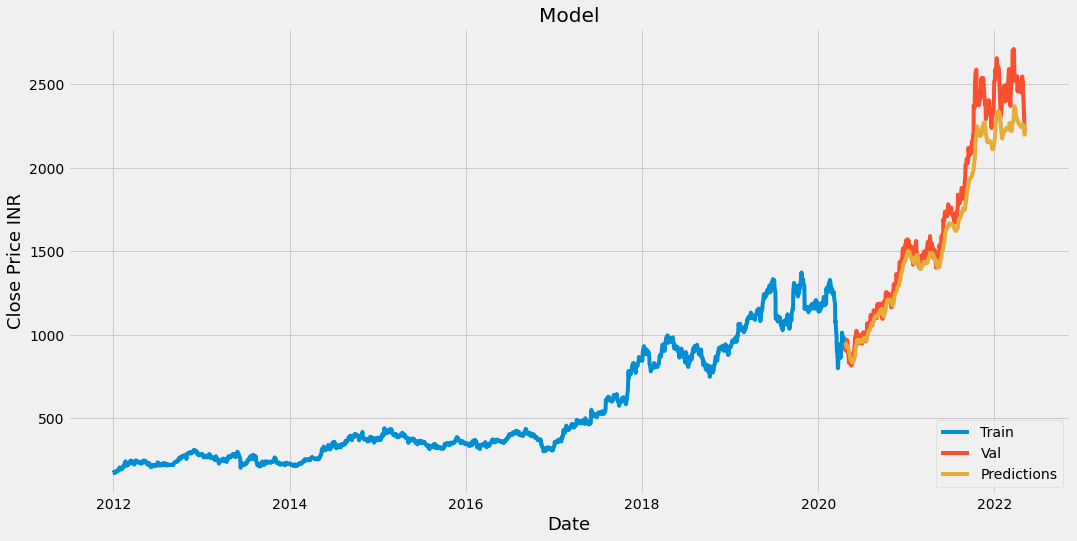

In [56]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price INR',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [57]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-04-22,951.400024,957.438660
2020-04-23,912.599976,955.423523
2020-04-24,906.049988,948.816528
2020-04-27,927.750000,939.992126
2020-04-28,932.849976,933.421631
...,...,...
2022-04-29,2458.199951,2260.495117
2022-05-02,2386.550049,2257.005371
2022-05-04,2289.949951,2243.999268


In [58]:
#Get the quote
apple_quote=web.DataReader('TITAN.NS',data_source='yahoo',start='2012-01-01',end='2022-05-08')
#create a new dataframe
new_df=apple_quote.filter(['Close'])
#get the last 60 day closing price values and convert the dataframe to an array
last_60_days=new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled=scaler.transform(last_60_days)
#create an empty list
X_test=[]
#append the past 60 days
X_test.append(last_60_days_scaled)
#convert the X_test data to a numpy array
X_test=np.array(X_test)
#reshape
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#get the predicted scaled price
pred_price=model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[2154.6506]]


In [60]:
#Get the quote

apple_quote2=web.DataReader('TITAN.NS',data_source='yahoo',start='2022-05-05',end='2022-05-05')
print(apple_quote2['Close'])

Date
2022-05-05    2262
Name: Close, dtype: int64
